**Modern Portfolio Theory (MPT)**

This notebook is a quick illustration of how Empyrial can be used for obtaining the optimal allocations.

In the example below, we pick some stocks and benchmark it against the S&P500. We are using SPY as it's the next-alternative 

(as opposed to trying to come up with our own allocations).



In [1]:
# !pip install empyrial

In [2]:
from empyrial import empyrial, Engine
import pandas as pd

**Parameter values:** <1>
* start_date = 2020-01-01; it's discretionary (Note 1)
* portfolio = List of string of symbols. Here, it's just a selection of large caps. 
* optimizer = "MINVAR" - Applying MPT with objective to minimize portfolio variance
* rebalance = once per quarter

Note 1: For "start_date" - Although academic studies suggest 12-months is the ideal lookback period for backtesting, the choice of it may rather be arbitrary. It can be argued that trying to find a best fitted start-end date for strategies over historical data may be counter productive. <2> 

In [3]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_2yrs_ago = pd.to_datetime(date_today) - pd.DateOffset(months=25)
date_2yrs_ago = date_2yrs_ago.strftime("%Y-%m-%d")
date_2yrs_ago

'2021-09-09'

In [12]:
portfolio = Engine(
    start_date = date_2yrs_ago,                                      
    portfolio = ["AAPL","JNJ","KO","MRK","PFE","PM","TSM", "MSFT", "MCD", "TSLA", "XOM" ],
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "monthly"
)

# Summary:

Start date: 2021-09-09
End date: 2023-10-09


,Backtest
,
Annual return,8.11%
Cumulative return,17.52%
Annual volatility,15.26 %
Winning day ratio,52.49%
Sharpe ratio,0.59
Calmar ratio,0.62
Information ratio,0.0
Stability,0.62
Max Drawdown,-13.1 %


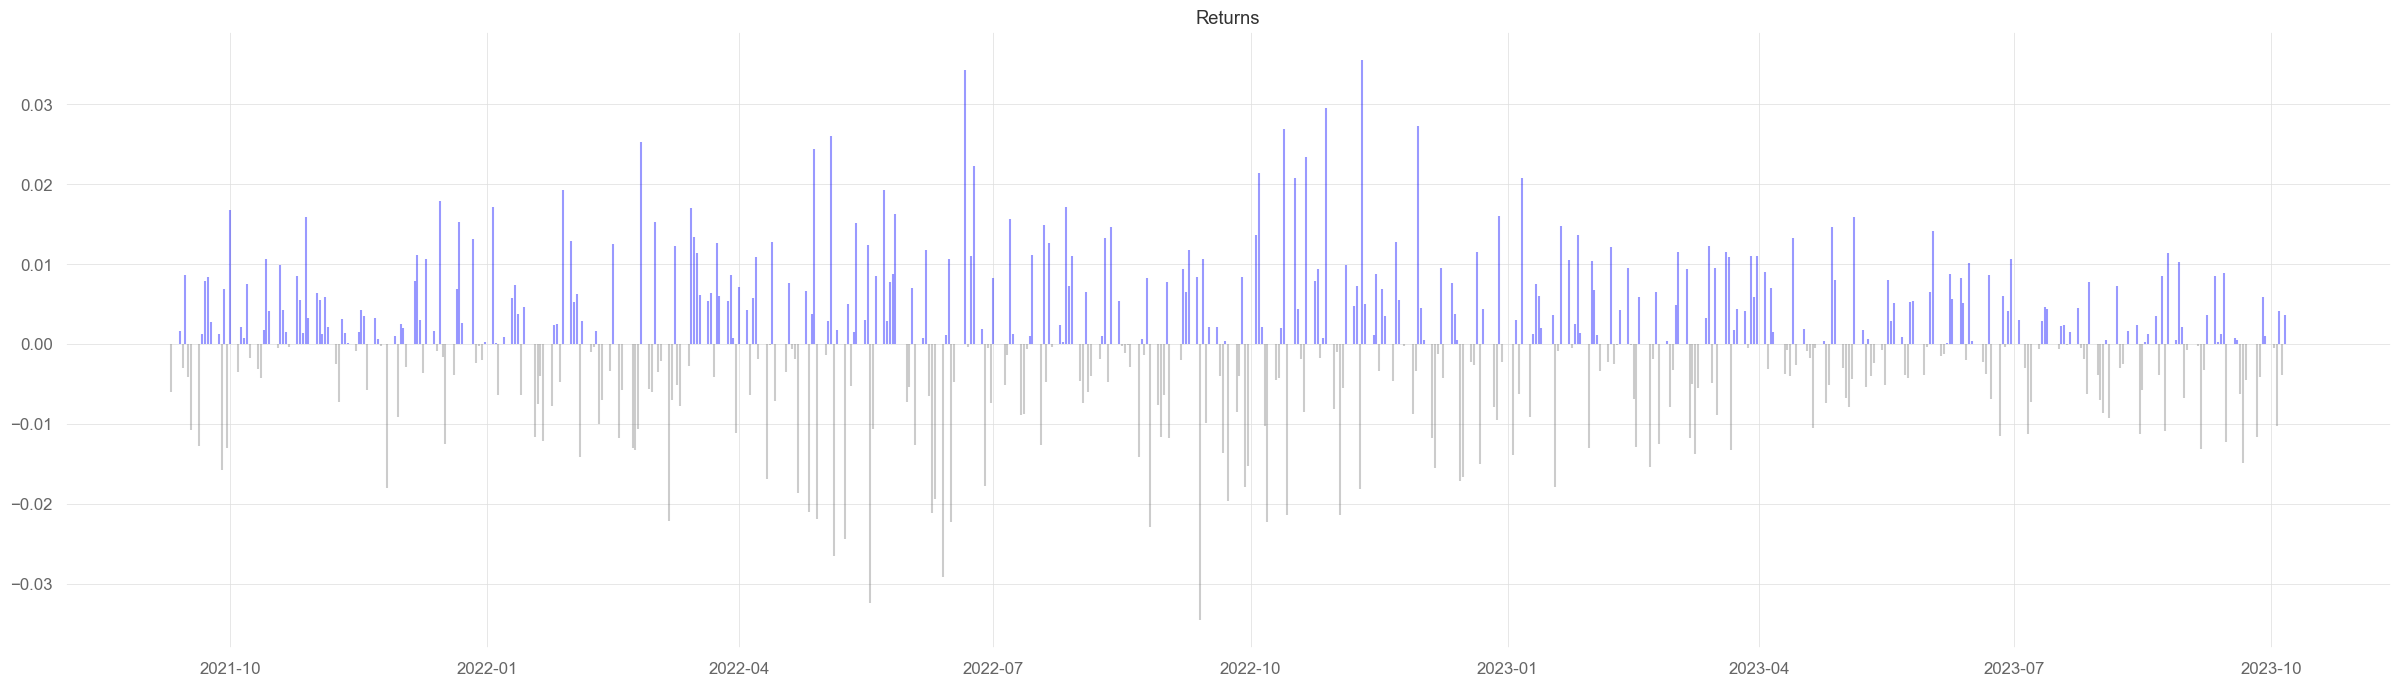

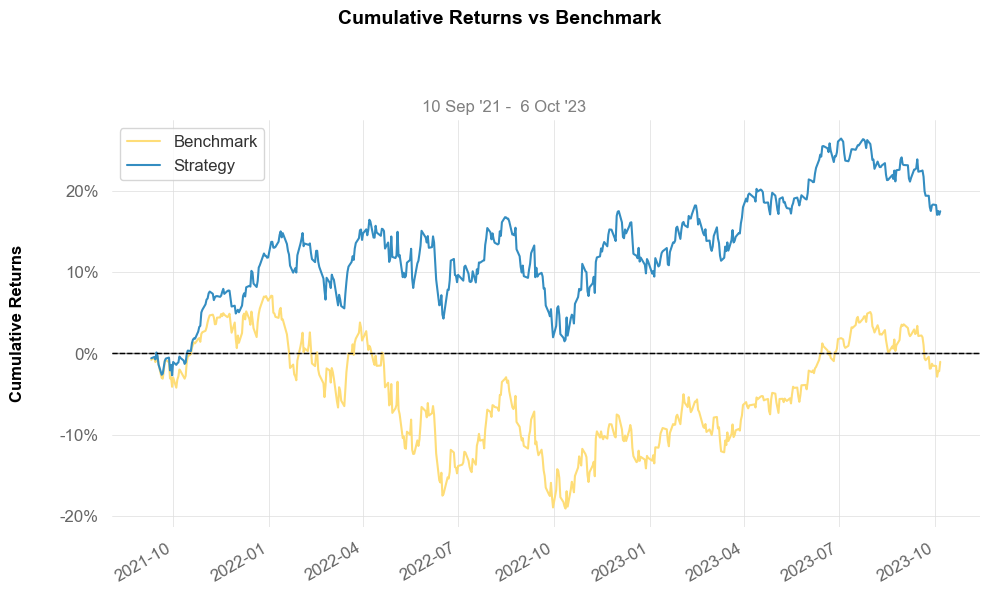

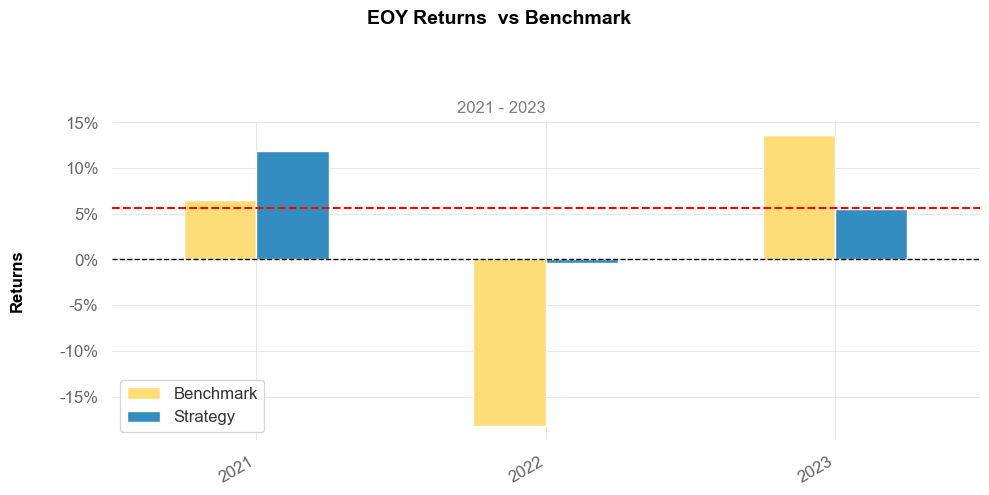

TypeError:  pivot() takes 1 positional argument but 4 were given


In [13]:
try:
    empyrial(portfolio)
except TypeError as e:
    print("TypeError: ", e)

# Summary of allocations

In [14]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2021-10-09,2021-11-08,2021-12-09,2022-01-08,2022-02-08,2022-03-10,2022-04-09,2022-05-10,2022-06-09,2022-07-10,...,2023-01-08,2023-02-08,2023-03-10,2023-04-09,2023-05-10,2023-06-09,2023-07-10,2023-08-09,2023-09-09,2023-10-09
AAPL,0.08784,0.08951,0.08916,0.08729,0.08527,0.08504,0.08454,0.08156,0.07908,0.07889,...,0.07571,0.07662,0.07711,0.07768,0.07784,0.07851,0.07899,0.07941,0.07952,0.07999
JNJ,0.09725,0.09373,0.09546,0.09783,0.09952,0.09954,0.09979,0.10224,0.10282,0.10412,...,0.10601,0.10556,0.10494,0.10438,0.10420,0.10383,0.10351,0.10311,0.10296,0.10279
KO,0.09367,0.09282,0.09277,0.09488,0.09655,0.09656,0.09703,0.09929,0.09726,0.09954,...,0.10015,0.10021,0.10015,0.10018,0.10023,0.09995,0.09989,0.09960,0.09959,0.09930
MRK,0.08830,0.08934,0.08960,0.09278,0.09366,0.09466,0.09544,0.09740,0.09970,0.10001,...,0.10362,0.10360,0.10300,0.10256,0.10242,0.10207,0.10171,0.10143,0.10100,0.10093
PFE,0.09606,0.09282,0.09869,0.10096,0.10039,0.09767,0.09814,0.09944,0.10008,0.09867,...,0.09826,0.09832,0.09813,0.09804,0.09796,0.09794,0.09749,0.09730,0.09711,0.09713
PM,0.08901,0.09148,0.09353,0.09529,0.09684,0.09544,0.09454,0.09869,0.10011,0.10126,...,0.09993,0.10000,0.09970,0.09958,0.09909,0.09893,0.09904,0.09874,0.09861,0.09831
TSM,0.09121,0.09062,0.08972,0.08562,0.08408,0.08274,0.08253,0.08099,0.08164,0.08205,...,0.08090,0.08135,0.08155,0.08203,0.08261,0.08252,0.08271,0.08294,0.08308,0.08316
MSFT,0.08699,0.09035,0.08947,0.08869,0.08765,0.08745,0.08684,0.08443,0.08408,0.08375,...,0.08025,0.08004,0.08034,0.08106,0.08161,0.08193,0.08207,0.08224,0.08260,0.08272
MCD,0.09347,0.09264,0.09252,0.09479,0.09593,0.09552,0.09530,0.09592,0.09619,0.09817,...,0.10075,0.10069,0.10050,0.10030,0.10019,0.09984,0.09970,0.09946,0.09941,0.09907
TSLA,0.08951,0.08644,0.07999,0.07175,0.06817,0.06770,0.06634,0.06283,0.06128,0.05760,...,0.05852,0.05826,0.05905,0.05939,0.05942,0.06012,0.06040,0.06108,0.06141,0.06166


In [15]:
print("But only want the allocation as of today: ") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

But only want the allocation as of today: 


,2023-10-09
AAPL,0.07999
JNJ,0.10279
KO,0.09930
MRK,0.10093
PFE,0.09713
PM,0.09831
TSM,0.08316
MSFT,0.08272
MCD,0.09907
TSLA,0.06166


---
References:

<1> Quick guide on how to set the parameter [https://empyrial.gitbook.io/empyrial/quickstart](https://empyrial.gitbook.io/empyrial/quickstart)

<2> Toma Hentea; Feb. 2019; "Optimal Lookback Period For Momentum Strategies" [Article from seekingalpha](https://seekingalpha.com/article/4240540-optimal-lookback-period-for-momentum-strategies )